In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd drive/My\ Drive/COMP4641\ Project/LSTM/

/content/drive/My Drive/COMP4641 Project/LSTM


In [0]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import sklearn 
import sklearn.metrics
import superfile as sf
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
%ls future/

maricopa_ts.csv  mesa_ts.csv  phoenix_ts.csv  scott_ts.csv  tempe_ts.csv


In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
cities = [
  'phoenix',
  'scott',
  'mesa',
  'tempe',
  'maricopa'
]
hidden_sizes = [
    4,
    8,
    16,
    32,
    64,
    128,
    256,
    512
]

all_dfs = {}
all_dataLoader = {}
all_data_dicts = {}
all_trainable_dicts = {}

for city in cities:
  all_dfs[city] = pd.read_csv('future/'+city+'_ts.csv').drop(['Unnamed: 0'],axis=1)

for city in cities:
  all_dataLoader[city] = sf.CustomDataLoader(all_dfs[city])

for city in cities:
  x,y =all_dataLoader[city].resampledData()
  all_data_dicts[city] = sf.generate_dict(x,y,device)

for city in cities:
  dict_hs = {}
  for hs in hidden_sizes:
    dict_hs[hs] = sf.Trainable(all_data_dicts[city],device,hs=hs,n_features=13,lr=3e-3)
  all_trainable_dicts[city] = dict_hs

2545 1165
857 336
738 318
636 260
735 392


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [0]:
def plotgraph(acc_list,title):
  x = np.array(cities)
  y = np.array(acc_list)
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Cities')
  plt.bar(x,y)


In [0]:
accuracy_list = []
for city in cities:
  print("\n-----Start Training-----")
  print("-----City:",city,'-----\n')
  all_trainable_dicts[city][8].train()
  print('\n-----Training Complete-----\n')
  accuracy_list.append(all_trainable_dicts[city][8].test_printout())

#plotgraph(accuracy_list,'Phoenix: Accuracy vs HiddenSize')


-----Start Training-----
-----City: phoenix -----



Epoch: 0, loss: 0.30211
Epoch: 1, loss: 0.29474
Epoch: 2, loss: 0.29968
Epoch: 3, loss: 0.29933
Epoch: 4, loss: 0.29570
Epoch: 5, loss: 0.29608
Epoch: 6, loss: 0.29153
Epoch: 7, loss: 0.29366
Epoch: 8, loss: 0.28938
Epoch: 9, loss: 0.29601

-----Training Complete-----


-----Start Training-----
-----City: scott -----



Epoch: 0, loss: 0.31678
Epoch: 1, loss: 0.29905
Epoch: 2, loss: 0.29443
Epoch: 3, loss: 0.29553
Epoch: 4, loss: 0.28697
Epoch: 5, loss: 0.28783
Epoch: 6, loss: 0.29017
Epoch: 7, loss: 0.28434
Epoch: 8, loss: 0.29295
Epoch: 9, loss: 0.28532

-----Training Complete-----


-----Start Training-----
-----City: mesa -----



Epoch: 0, loss: 0.29880
Epoch: 1, loss: 0.27397
Epoch: 2, loss: 0.28872
Epoch: 3, loss: 0.27784
Epoch: 4, loss: 0.28174
Epoch: 5, loss: 0.27861
Epoch: 6, loss: 0.27940
Epoch: 7, loss: 0.28012
Epoch: 8, loss: 0.28547
Epoch: 9, loss: 0.27726

-----Training Complete-----


-----Start Training-----
-----City: tempe -----



Epoch: 0, loss: 0.30834
Epoch: 1, loss: 0.28796
Epoch: 2, loss: 0.29747
Epoch: 3, loss: 0.29358
Epoch: 4, loss: 0.28686
Epoch: 5, loss: 0.29742
Epoch: 6, loss: 0.28476
Epoch: 7, loss: 0.29610
Epoch: 8, loss: 0.28974
Epoch: 9, loss: 0.30473

-----Training Complete-----


-----Start Training-----
-----City: maricopa -----



Epoch: 0, loss: 0.33435
Epoch: 1, loss: 0.30441
Epoch: 2, loss: 0.29868
Epoch: 3, loss: 0.29078
Epoch: 4, loss: 0.28691
Epoch: 5, loss: 0.29521
Epoch: 6, loss: 0.30127
Epoch: 7, loss: 0.28595
Epoch: 8, loss: 0.29495
Epoch: 9, loss: 0.28310

-----Training Complete-----



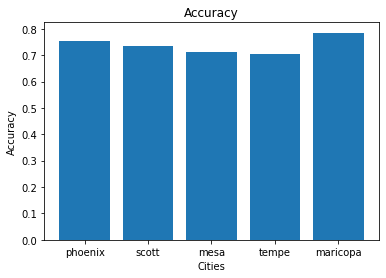

In [0]:
plotgraph(accuracy_list,'Accuracy')